importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,7)
plt.style.use('ggplot')
%config InlineBackend.figure_formats={'png','retina'}

book_db = pd.read_csv('C:\\Users\\shmah\\OneDrive\\دسکتاپ\\books.csv', on_bad_lines = 'skip')
book_db.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [2]:
book_db.rename(columns={'  num_pages':'num_pages'},inplace=True)

data_frequency

In [3]:
book_db.shape
book_db.dtypes
book_db.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
bookID,11123.0,NaN,NaN,NaN,21310.856963,13094.727252,1.0,10277.5,20287.0,32104.5,45641.0
title,11123,10348,The Iliad,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
authors,11123,6639,Stephen King,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_rating,11123.0,NaN,NaN,NaN,3.934075,0.350485,0.0,3.77,3.96,4.14,5.0
isbn,11123,11123,0439785960,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isbn13,11123.0,NaN,NaN,NaN,9759880247639.154297,442975846058.352783,8987059752.0,9780345453803.5,9780582461536.0,9780872208045.5,9790007672386.0
language_code,11123,27,eng,8908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_pages,11123.0,NaN,NaN,NaN,336.405556,241.152626,0.0,192.0,299.0,416.0,6576.0
ratings_count,11123.0,NaN,NaN,NaN,17942.848063,112499.153471,0.0,104.0,745.0,5000.5,4597666.0
text_reviews_count,11123.0,NaN,NaN,NaN,542.048099,2576.619589,0.0,9.0,47.0,238.0,94265.0


checking if there is any missing_value?

In [4]:
book_db.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

Cheking if there is any duplicate values?

In [5]:
book_db.duplicated(subset=['isbn','isbn13']).sum()

0

define publication_date as a time

In [6]:
book_db.loc[8177,:]
book_db.loc[8177,'publication_date']="10/31/2000"
book_db.loc[11094,:]
book_db.loc[11094,'publication_date']="6/30/1982"
book_db['publication_date']=pd.to_datetime(book_db['publication_date'])
book_db.dtypes

bookID                         int64
title                         object
authors                       object
average_rating               float64
isbn                          object
isbn13                         int64
language_code                 object
num_pages                      int64
ratings_count                  int64
text_reviews_count             int64
publication_date      datetime64[ns]
publisher                     object
dtype: object

Draw distribution of average_rating

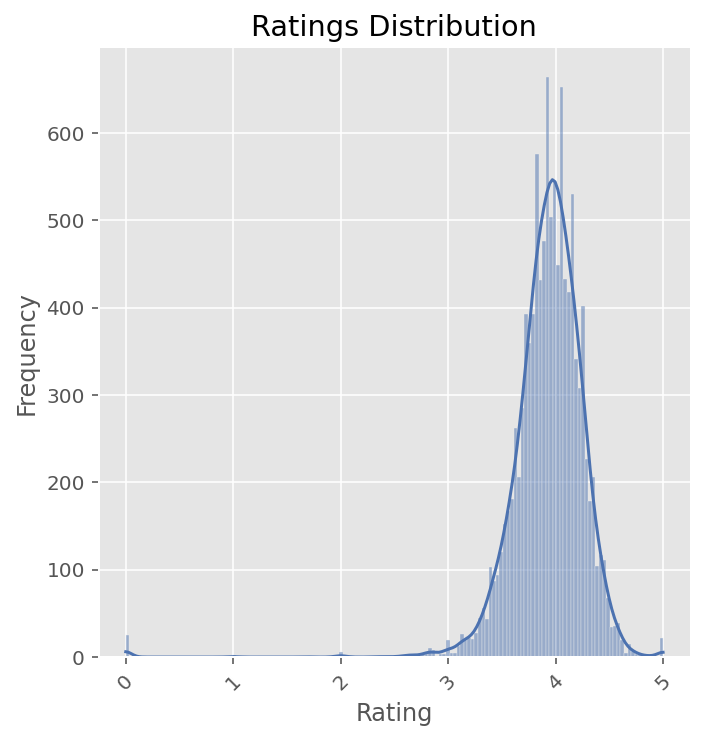

In [7]:
palette = "deep" 
sns.set_palette(palette)
sns.displot(data=book_db, x='average_rating',kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Ratings Distribution')
plt.xticks(rotation=45);

Draw distribution of ratings_count

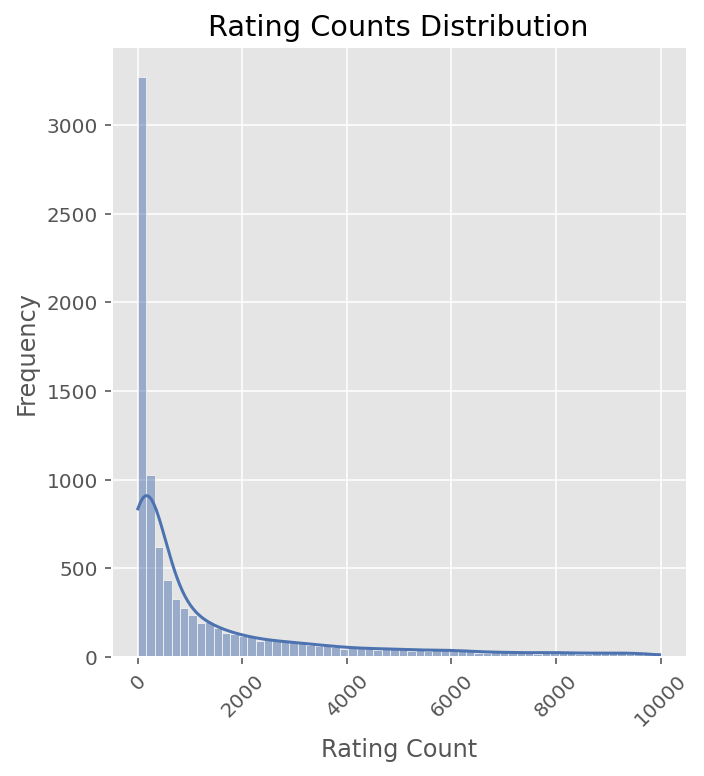

In [8]:
palette = "deep"
sns.set_palette(palette)
filtered_data = book_db[book_db['ratings_count'] <= 10000]  
sns.displot(data=filtered_data, x='ratings_count', kde=True)
plt.xlabel('Rating Count')
plt.ylabel('Frequency')
plt.title('Rating Counts Distribution')
plt.xticks(rotation=45);

Draw distribution of number of pages

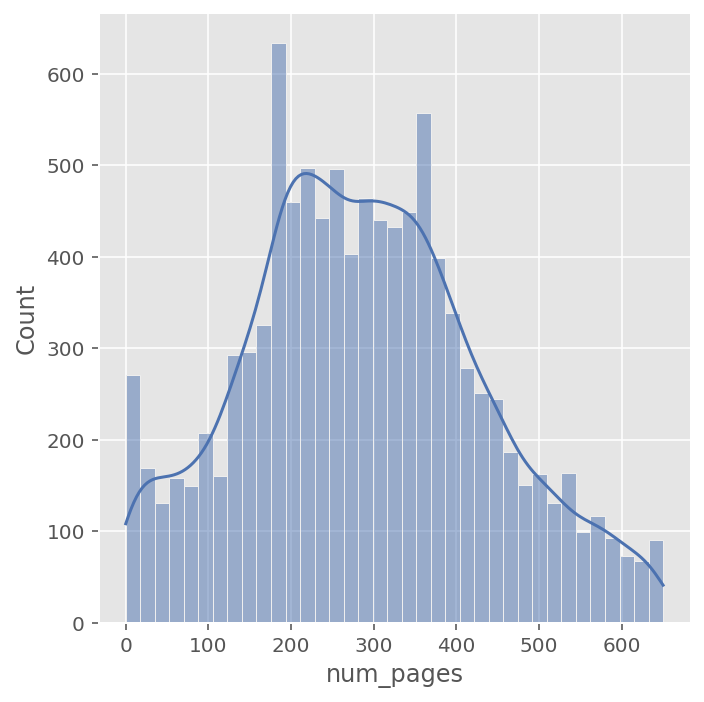

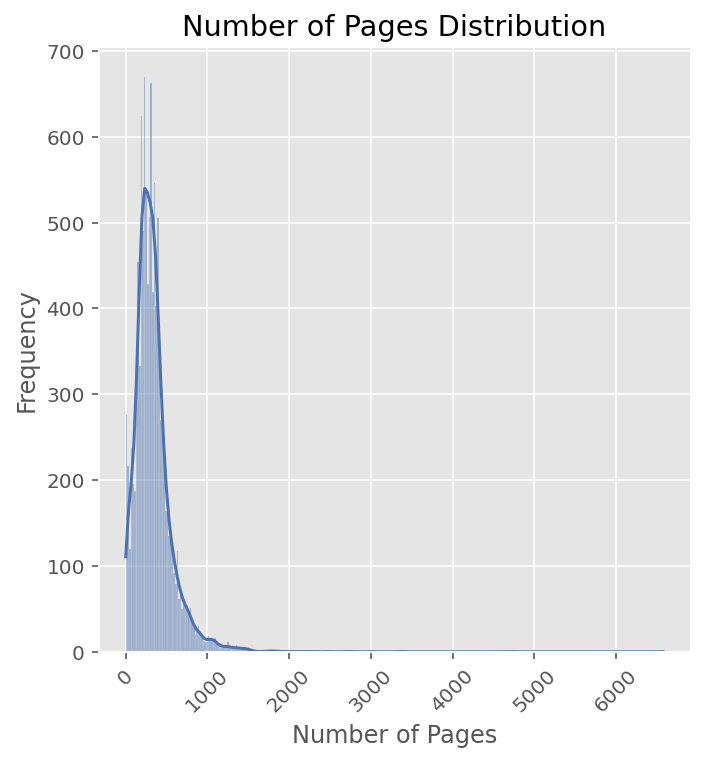

In [10]:
palette = "deep" 
sns.set_palette(palette)
filtered_data = book_db[book_db['num_pages'] <= 650]
sns.displot(data=filtered_data, x='num_pages', kde=True)
sns.displot(data=book_db, x='num_pages',kde=True)
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.title('Number of Pages Distribution')
plt.xticks(rotation=45);

Draw distribution of publication date

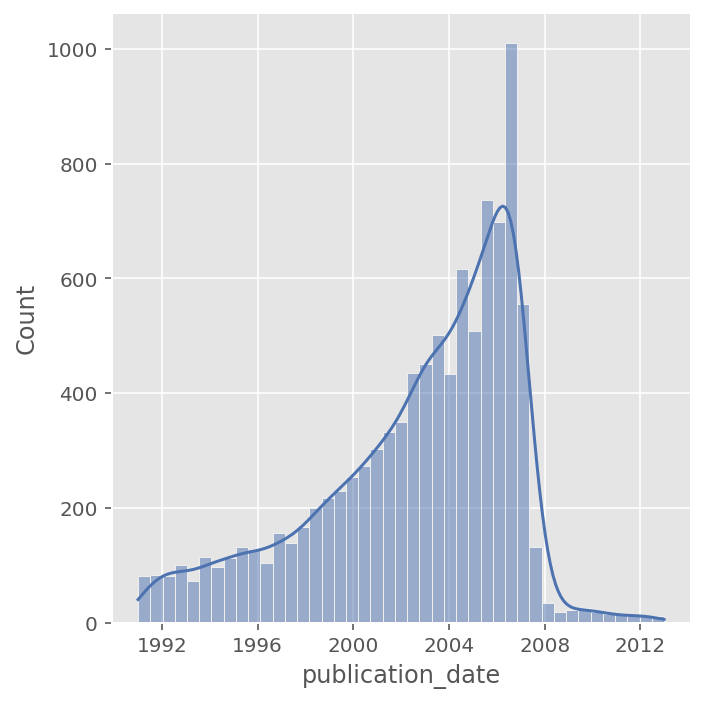

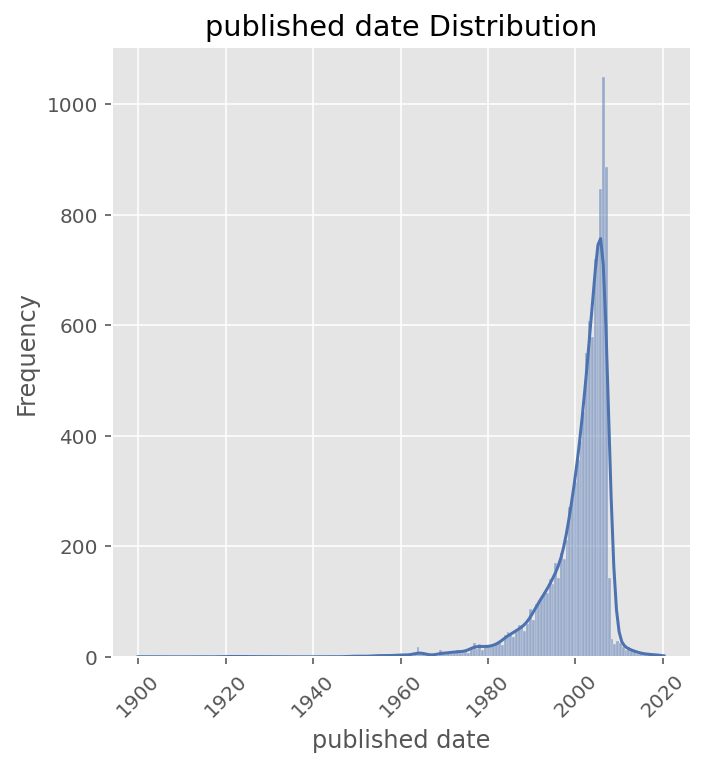

In [11]:
palette = "deep" 
sns.set_palette(palette)
start_date = pd.to_datetime('1991-01-01')
end_date = pd.to_datetime('2012-12-31')
filtered_data = book_db[(book_db['publication_date'] >= start_date) & (book_db['publication_date'] <= end_date)]
sns.displot(data=filtered_data, x='publication_date', kde=True)
sns.displot(data=book_db, x='publication_date',kde=True)
plt.xlabel('published date')
plt.ylabel('Frequency')
plt.title('published date Distribution')
plt.xticks(rotation=45);

20 most popular book base on number of rating

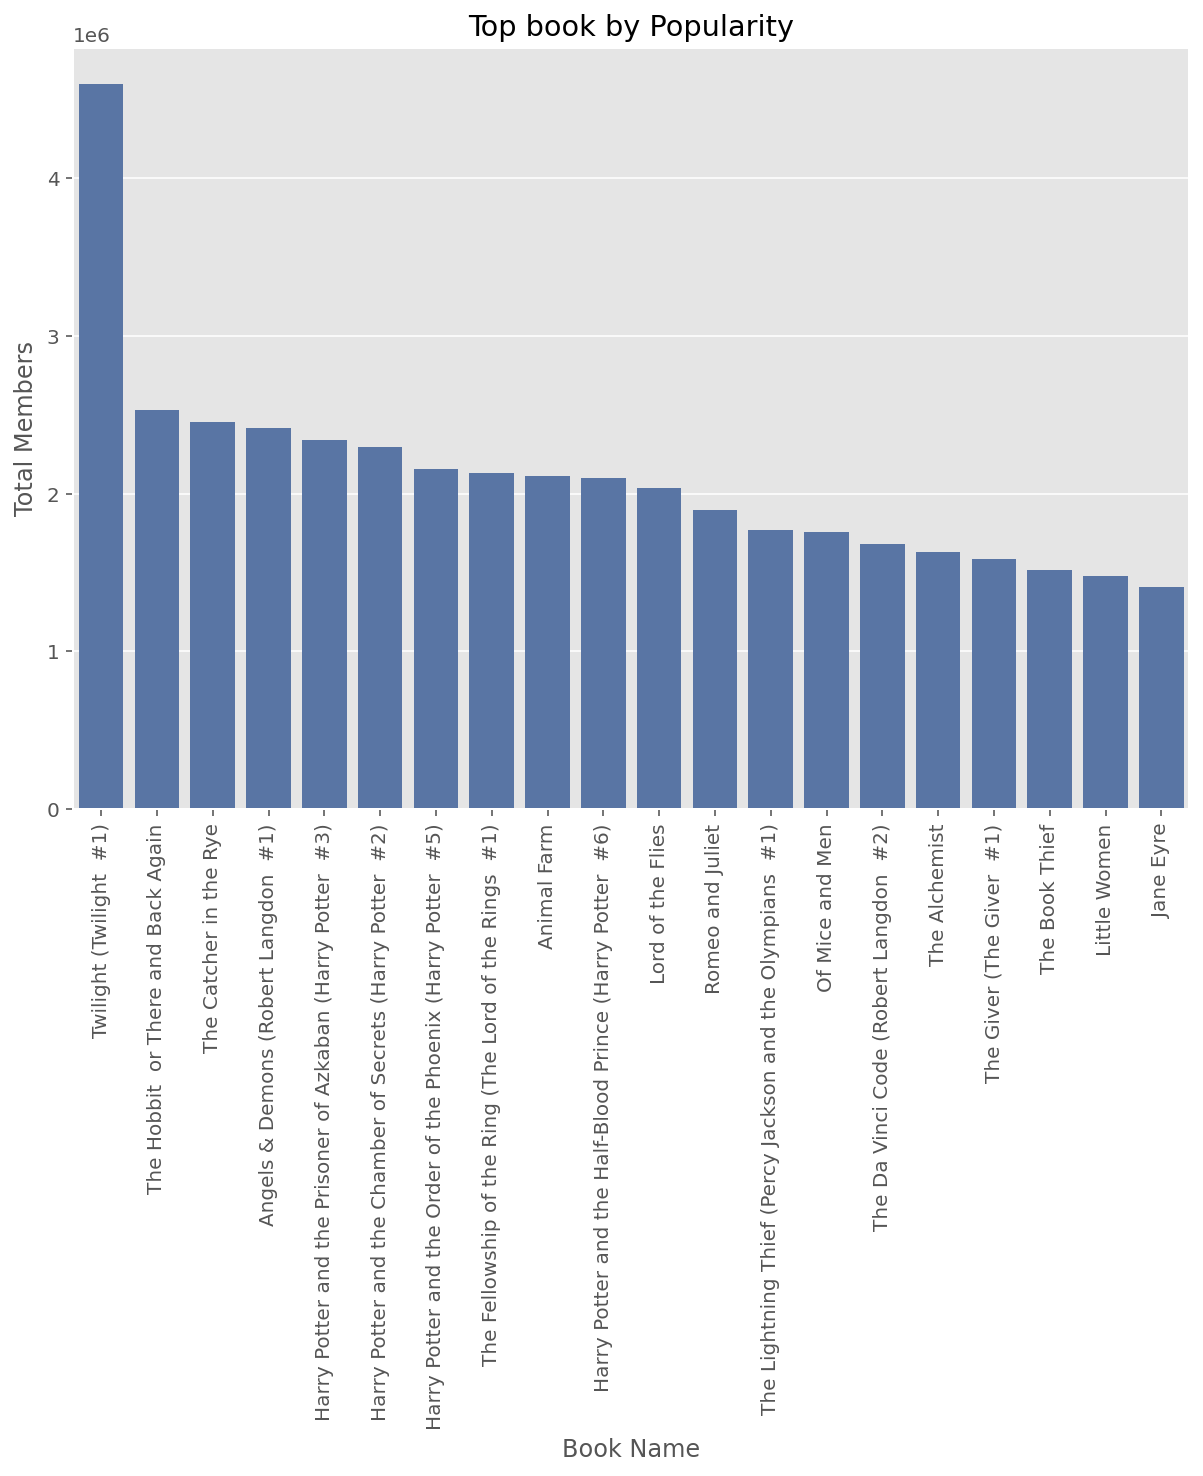

In [12]:
top_book = book_db.sort_values(["ratings_count"],ascending=False)
sns.barplot(x=top_book["title"][:20],y=top_book["ratings_count"][:20])
plt.xlabel("Book Name")
plt.ylabel('Total Members')
plt.title("Top book by Popularity")
plt.xticks(rotation=90);

50 most popular book base on score of rate

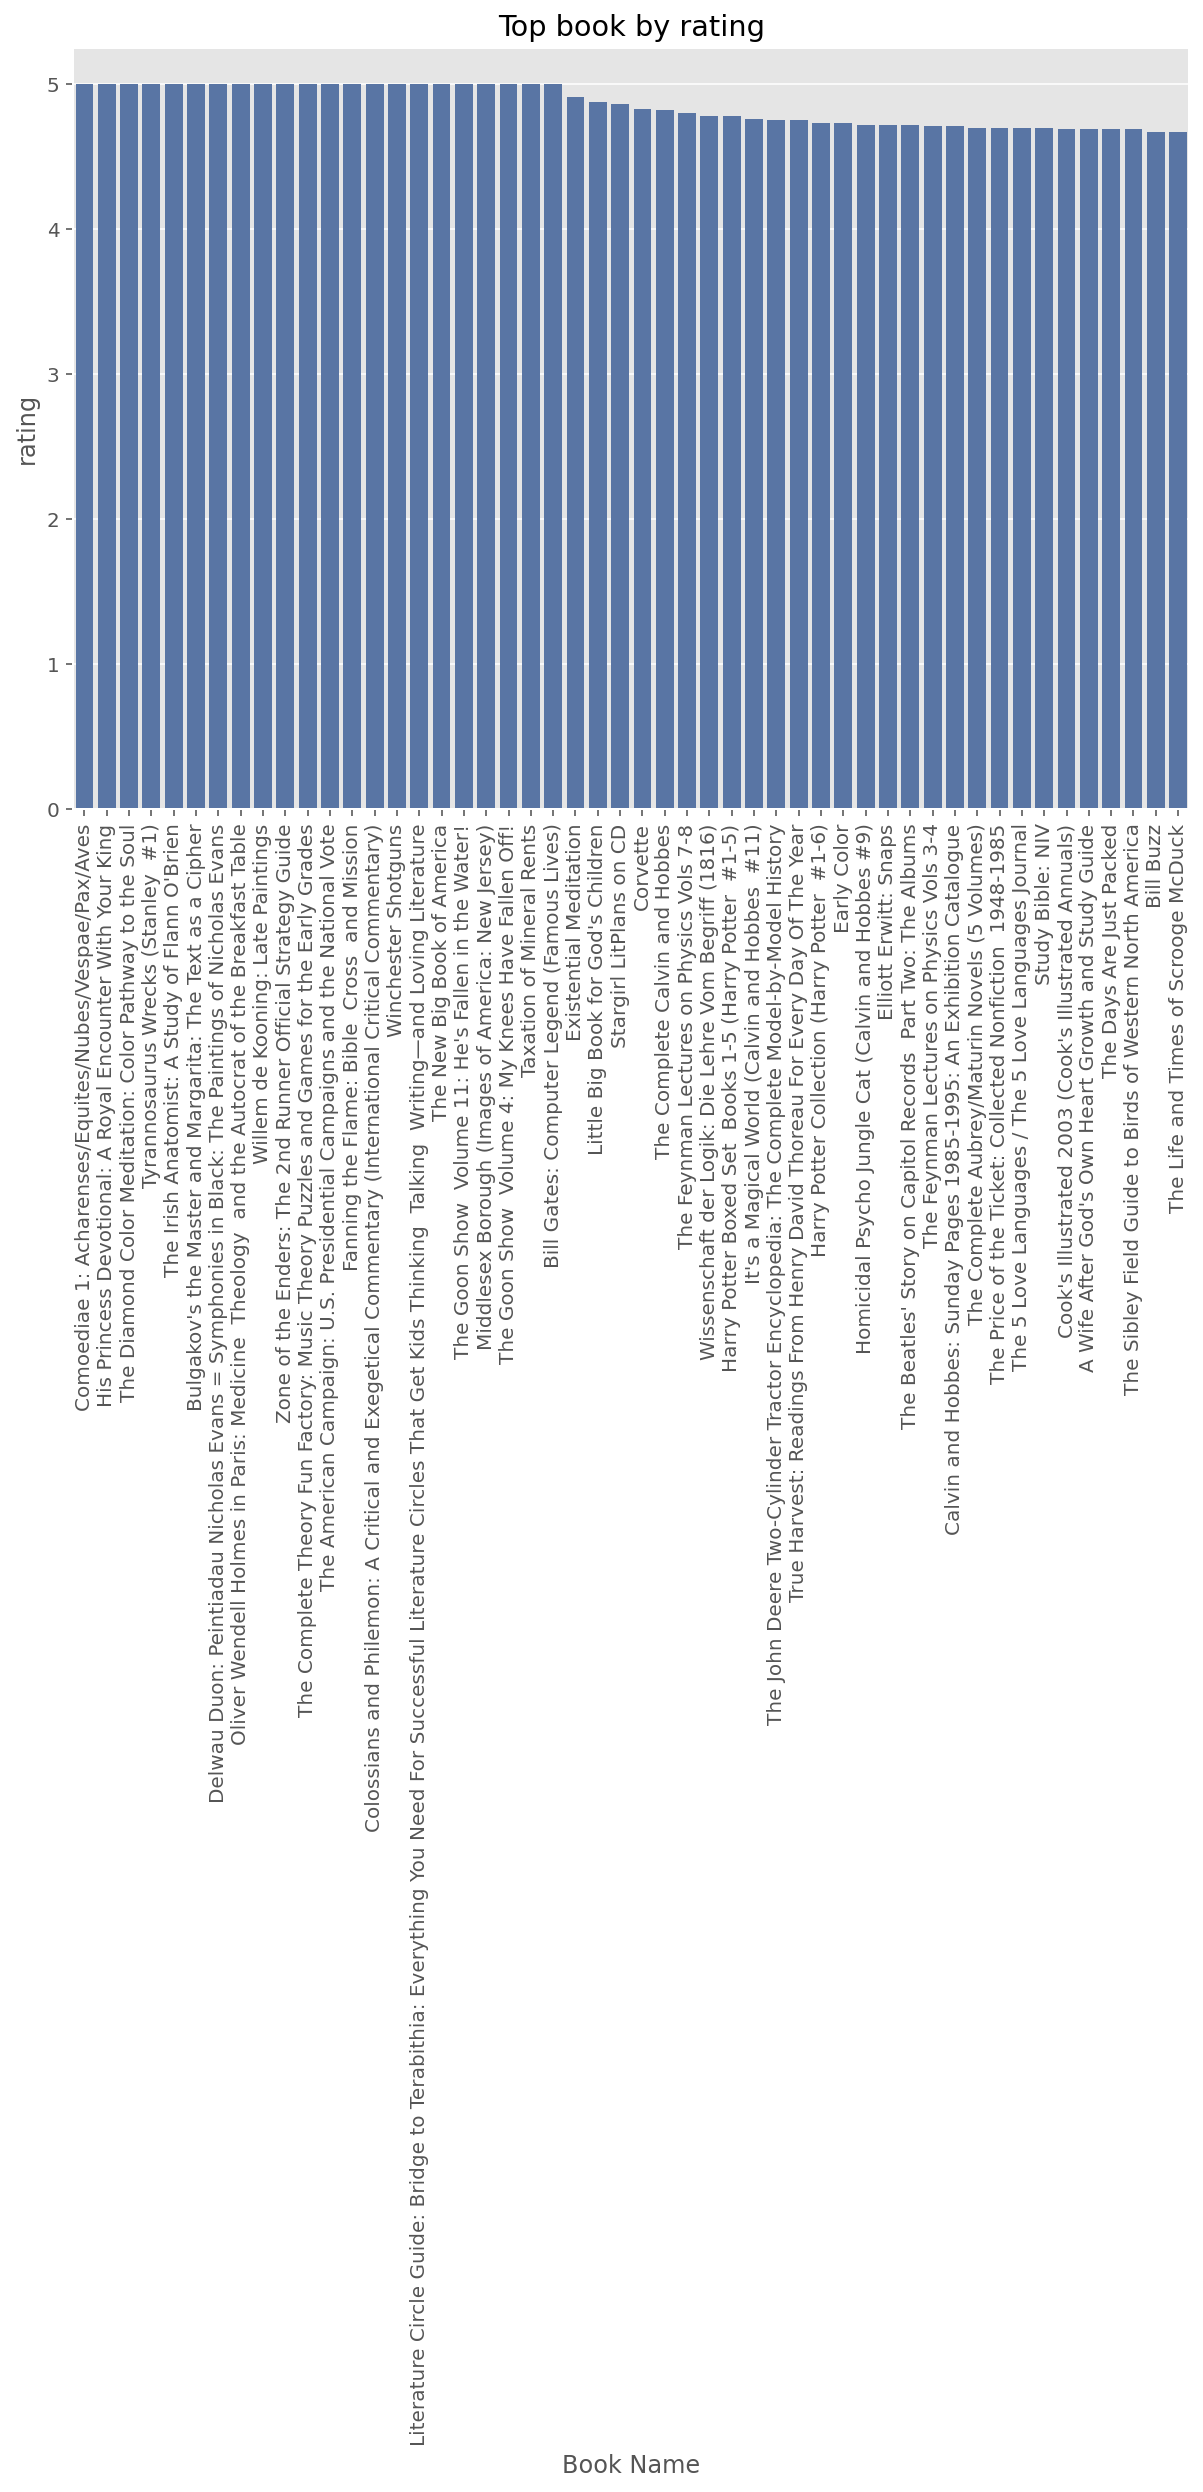

In [13]:
top_book = book_db.sort_values(["average_rating"],ascending=False)
sns.barplot(x=top_book["title"][:50],y=top_book["average_rating"][:50])
plt.xlabel("Book Name")
plt.ylabel('rating')
plt.title("Top book by rating")
plt.xticks(rotation=90);

Calculating Weighted Rating Formula base on IMDB Weighted Rating Formula

In [14]:
C = book_db['average_rating'].mean()
m = book_db['ratings_count'].quantile(0.80)
def weighted_rating(row, m=m, C=C):
    v = row['ratings_count']
    R = row['average_rating']
    return (v / (v + m) * R) + (m / (v + m) * C)
book_db['weighted_rating'] = book_db.apply(weighted_rating, axis=1)
book_db = book_db.sort_values('weighted_rating', ascending=False).reset_index()
book_db.head()
book_db[book_db['title'] == 'In Wonderland']

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,weighted_rating
7853,8489,32592,In Wonderland,Knut Hamsun/Sverre Lyngstad,3.6,0970312555,9780970312556,nor,185,86,8,2003-09-01,Ig Publishing,3.930511


what is the most popular book in each language?

In [16]:
max_rating_indices = book_db.groupby('language_code')['weighted_rating'].idxmax()
most_popular_books = book_db.loc[ max_rating_indices,['language_code','title','weighted_rating']]
MAX_TITLE_LENGTH = 15
book_db['title'] = book_db['title'].apply(
    lambda x: x[:MAX_TITLE_LENGTH] + '...' if len(x) > MAX_TITLE_LENGTH else x
)
print(most_popular_books)

     language_code                    title  weighted_rating
3776           ale  Shield of Thunder (T...         3.939454
8197           ara                     Zaat         3.928288
977          en-CA  A Circle of Quiet (C...         4.043434
34           en-GB         The Kissing Hand         4.369813
57           en-US  Essential Tales and ...         4.314318
0              eng  The Complete Calvin ...         4.644195
883            enm  The Riverside Chauce...         4.055358
765            fre            Trainspotting         4.071455
1835           ger  Das Parfum. Die Gesc...         3.981173
5041           gla  Harry Potter and the...         3.934814
7617           glg      Os libros arden mal         3.931496
4499           grc  Frogs/Assemblywomen/...         3.936068
1639           ita  Purgatorio (La Divin...         3.991025
2466           jpn  Death Note  Vol. 4: ...         3.958530
3069           lat  Harrius Potter et Ph...         3.946867
5145           msa  Kena

what is the most popular book of each publisher?

In [17]:
max_rating_indices = book_db.groupby('publisher')['weighted_rating'].idxmax()
most_popular_books = book_db.loc[ max_rating_indices,['publisher','title','weighted_rating']]
MAX_TITLE_LENGTH = 20
MAX_Publisher_LENGTH = 10
book_db['title'] = book_db['title'].apply(
    lambda x: x[:MAX_TITLE_LENGTH] + '...' if len(x) > MAX_TITLE_LENGTH else x
)
book_db['publisher'] = book_db['publisher'].apply(
    lambda x: x[:MAX_Publisher_LENGTH] + '...' if len(x) > MAX_Publisher_LENGTH else x
)
#print(most_popular_books)
print(most_popular_books[most_popular_books['publisher'] == 'Scholastic'])

    publisher               title  weighted_rating
1  Scholastic  Harry Potter Bo...         4.643445


what is the most popular book of each writer?

In [18]:
max_rating_indices = book_db.groupby('authors')['weighted_rating'].idxmax()
most_popular_books = book_db.loc[ max_rating_indices,['authors','title','weighted_rating']]
MAX_TITLE_LENGTH = 20
MAX_authors_LENGTH = 10
book_db['title'] = book_db['title'].apply(
    lambda x: x[:MAX_TITLE_LENGTH] + '...' if len(x) > MAX_TITLE_LENGTH else x
)
book_db['authors'] = book_db['authors'].apply(
    lambda x: x[:MAX_authors_LENGTH] + '...' if len(x) > MAX_authors_LENGTH else x
)
#print(most_popular_books)
print(most_popular_books[most_popular_books['authors'] == 'Adam Woog'])

        authors               title  weighted_rating
5818  Adam Woog  The History of ...         3.934117


what is the most popular book of each year?

In [19]:
book_db['publication_year'] = book_db['publication_date'].dt.year
max_rating_indices = book_db.groupby('publication_year')['weighted_rating'].idxmax()
most_popular_books = book_db.loc[ max_rating_indices,['publication_year','title','weighted_rating']]
MAX_TITLE_LENGTH = 20
book_db['title'] = book_db['title'].apply(
    lambda x: x[:MAX_TITLE_LENGTH] + '...' if len(x) > MAX_TITLE_LENGTH else x
)
print(most_popular_books)
print(most_popular_books[most_popular_books['publication_year'] == 1952])

      publication_year               title  weighted_rating
7485              1900  Consider the Li...         3.931914
5361              1913  On Duties (De O...         3.934431
5603              1914  Agricola / Germ...         3.934247
3269              1919  History of the ...         3.943885
4505              1921  History of the ...         3.936048
...                ...                 ...              ...
1879              2016  When the Heart ...         3.978903
1122              2017  Rick Steves' Eu...         4.028657
997               2018  Ariel: The Rest...         4.041260
1204              2019  The Art of Lovi...         4.021685
9162              2020  A Quick Bite (A...         3.914439

[87 rows x 3 columns]
      publication_year               title  weighted_rating
1897              1952  A Streetcar Nam...         3.978494


what is the most popular book in each month?

In [20]:
book_db['publication_month'] = book_db['publication_date'].dt.month
max_rating_indices = book_db.groupby('publication_month')['weighted_rating'].idxmax()
most_popular_books = book_db.loc[ max_rating_indices,['publication_month','title','weighted_rating']]
MAX_TITLE_LENGTH = 20
book_db['title'] = book_db['title'].apply(
    lambda x: x[:MAX_TITLE_LENGTH] + '...' if len(x) > MAX_TITLE_LENGTH else x
)
print(most_popular_books)
#print(most_popular_books[most_popular_books['publication_month'] == 2])

    publication_month               title  weighted_rating
26                  1  Dead Beat (The ...         4.390278
46                  2           The Lorax         4.337624
12                  3  Season of Mists...         4.457995
36                  4  The Ultimate Hi...         4.366191
3                   5  Harry Potter an...         4.557874
14                  6  The Lord of the...         4.436724
31                  7  World's End (Th...         4.374179
23                  8  A Breath of Sno...         4.404584
0                   9  The Complete Ca...         4.644195
8                  10  The Complete Ma...         4.508878
21                 11  The Absolute Sa...         4.408226
71                 12  Cursor's Fury (...         4.301838


what is the mean weighted rate of each author?

In [24]:
def fun_authors_name(text):
    arlen = text.split('/')
    return arlen[0]
book_db['authors_name'] = book_db['authors'].apply(lambda x : fun_authors_name(x))
max_rating_indices = book_db.groupby('authors_name')['weighted_rating'].idxmax()
most_popular_author = book_db.loc[ max_rating_indices,['authors_name','weighted_rating']]
most_popular_author = most_popular_author.sort_values(["weighted_rating"],ascending=False)
print(most_popular_author)
print(most_popular_author[most_popular_author['authors_name'] == 'Tucker Max'])

        authors_name  weighted_rating
0      Bill Watte...         4.644195
1      J.K. Rowli...         4.643445
6      J.R.R. Tol...         4.542101
8      Art Spiege...         4.508878
11     Hiromu Ara...         4.462095
...              ...              ...
11071     Tucker Max         3.569316
11105  Kate Jacob...         3.476589
11110  Curtis Sit...         3.449830
11116  Ian Caldwe...         3.399709
11121  Karen Joy ...         3.183680

[4003 rows x 2 columns]
      authors_name  weighted_rating
11071   Tucker Max         3.569316


Scatter plot

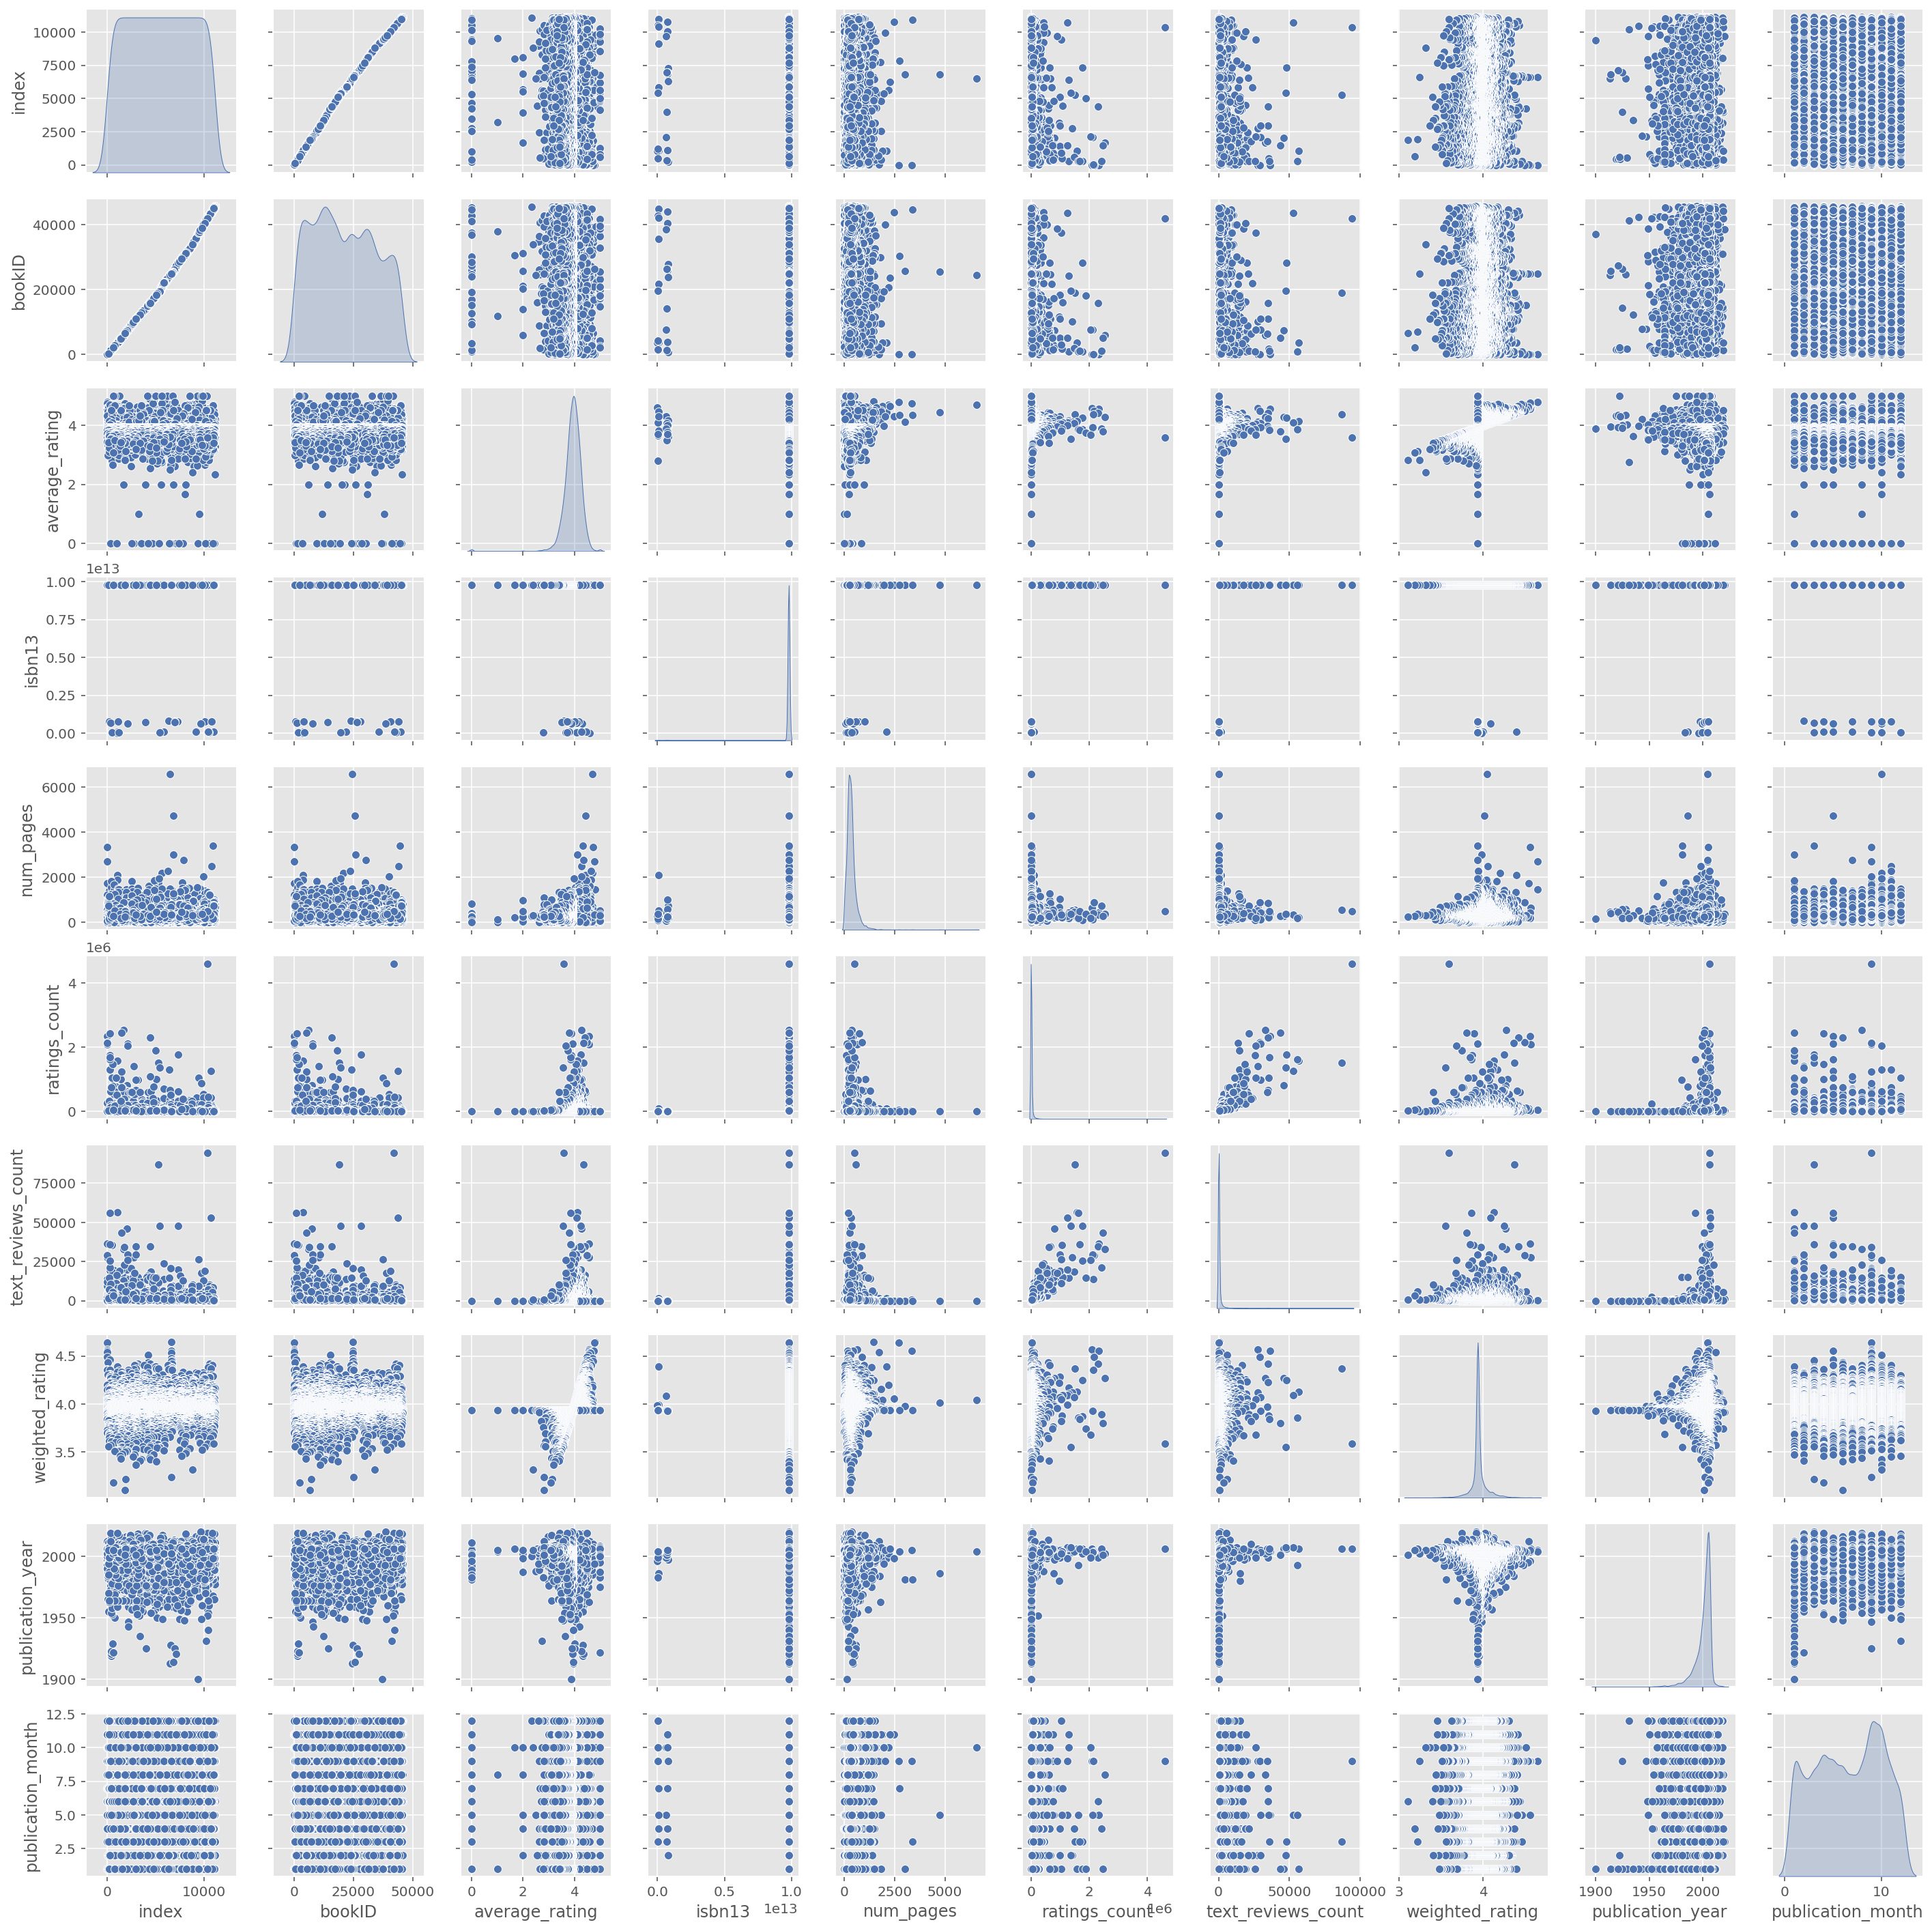

In [26]:
sns.pairplot(book_db, size=2, kind="scatter", diag_kind="kde");